In [1]:
from causalimpact import CausalImpact

import numpy as np
import pandas as pd
import datetime
from datetime import datetime

from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters

In [3]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
data = pd.read_csv("subs_dashboard_android.csv", parse_dates=['Date'],skiprows = 1,  usecols=[0,1, 2, 3, 4], names=['Date','Acquired Users', 'Trials', 'Direct Subs', 'Intro Subs'])

In [5]:
data.head(5)

,Date,Acquired Users,Trials,Direct Subs,Intro Subs
0,2022-05-01,219,155,28,36
1,2022-05-02,281,188,47,46
2,2022-05-03,258,178,47,33
3,2022-05-04,305,191,58,56
4,2022-05-05,346,235,58,53


In [6]:
data['Subs'] = data['Direct Subs'] + data['Intro Subs']

In [7]:
data.set_index('Date', inplace=True)

**Trials**

In [8]:
trials = data[['Trials']]

In [9]:
trials.shape

(200, 1)

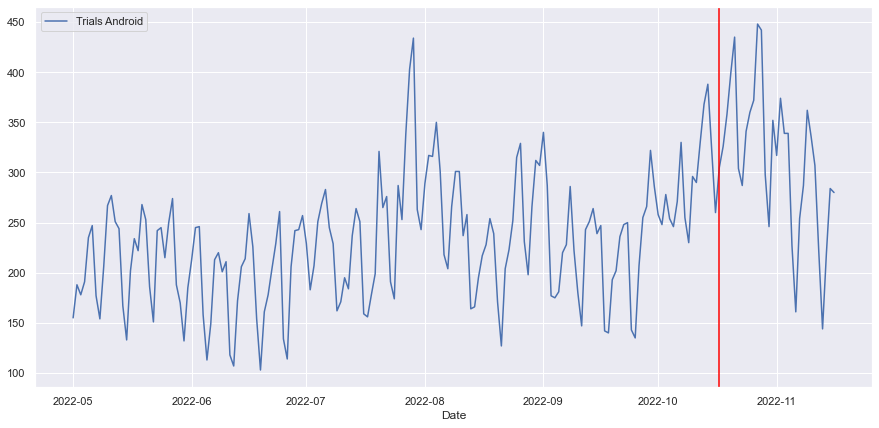

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(x=trials.index, y=trials['Trials'].values)
plt.axvline(trials[trials.index == '2022-10-17'].index, color='red')
plt.legend(labels = ['Trials Android'])

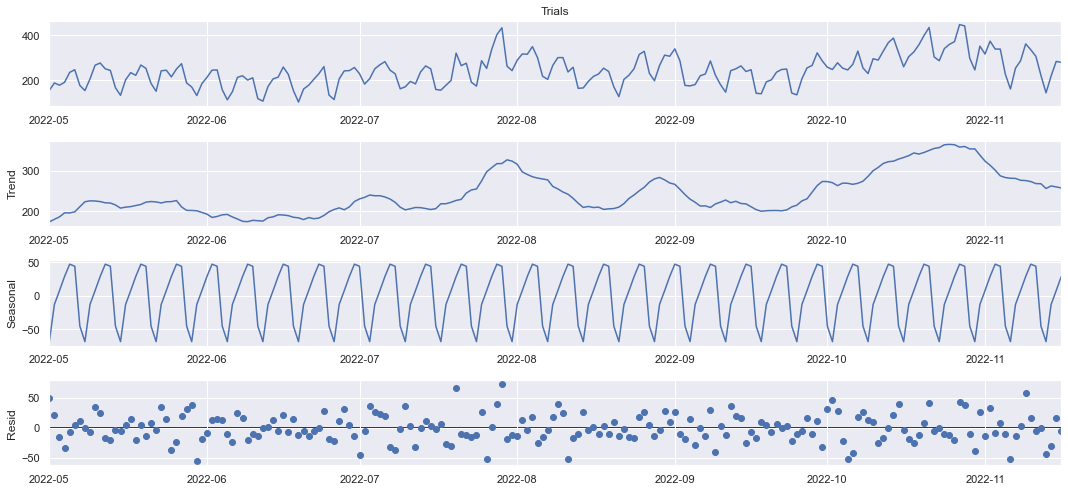

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(trials['Trials'], model = 'additive', extrapolate_trend = 'freq')
result.plot()
plt.show()

Weekly seasonality

In [12]:
print('Trials for the post period: ',trials.loc[trials.index >= '2022-10-17'].sum())

Trials for the post period:  Trials    9725
dtype: int64


In [13]:
print('Trials for the pre period: ', trials.loc[trials.index < '2022-10-17'].sum())

Trials for the pre period:  Trials    38837
dtype: int64


In [14]:
# Set pre-period
pre_period = [str('2022-05-01'), str('2022-10-16')]
# Set post-period
post_period = [str('2022-10-17'), str('2022-11-16')]

In [15]:
print('Pre-period is from ', pre_period[0], ' to ', pre_period[1])
print('Post-period is from ', post_period[0], ' to ', post_period[1])

Pre-period is from  2022-05-01  to  2022-10-16
Post-period is from  2022-10-17  to  2022-11-16


Causal impact model

C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


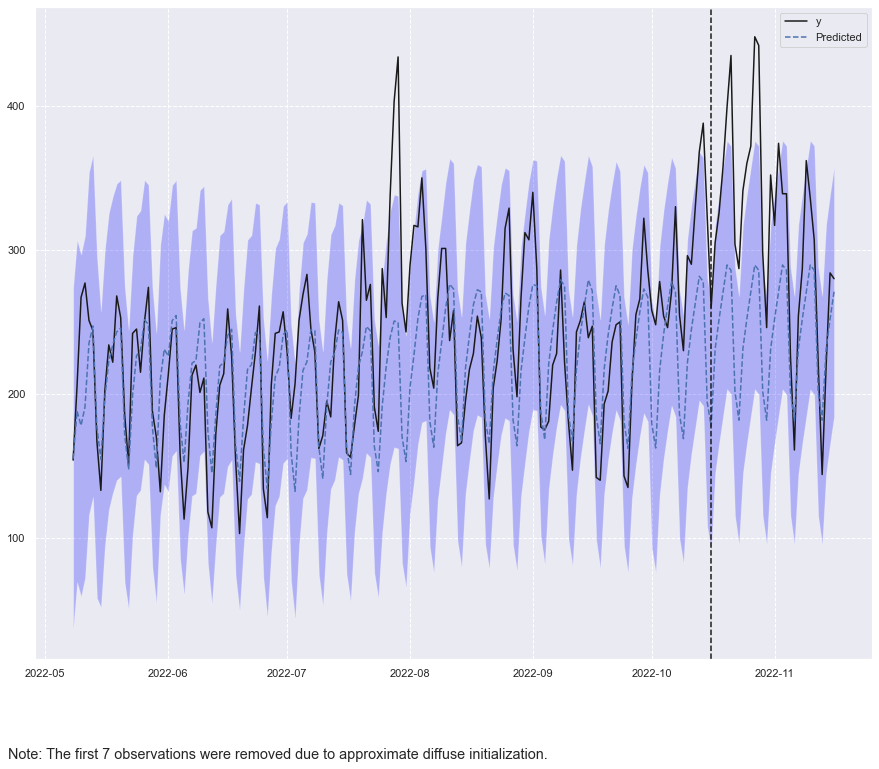

In [16]:
# Causal impact model, prior_level_sd default of 0.01
impact = CausalImpact(data=trials, pre_period=pre_period, post_period=post_period,
                      #prior_level_sd = None,
                     nseasons=[{'period': 7}]
                     )
impact.plot(panels=['original'])

In [17]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 313.71. By contrast, in the absence of an
intervention, we would have expected an average response of 245.33.
The 95% interval of this counterfactual prediction is [225.92, 264.9].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 68.38 with a 95% interval of
[48.81, 87.79]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 9725.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 7605.2. The 95% interval of this prediction is [7003.53, 8211.82].


The above results are given in terms of absolute numbers. In relative
terms, the response v

**increase of +27.87%** \
observed: 9725 \
predicted: 7605 \
difference: 2120

**Subs**

In [18]:
subs = data[['Subs']]

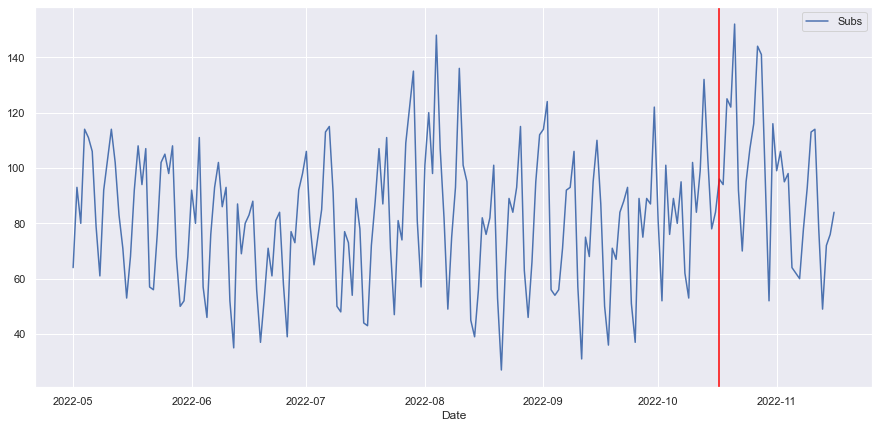

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(x=subs.index, y=subs['Subs'].values)
plt.axvline(subs[subs.index == '2022-10-17'].index, color='red')
plt.legend(labels = ['Subs'])

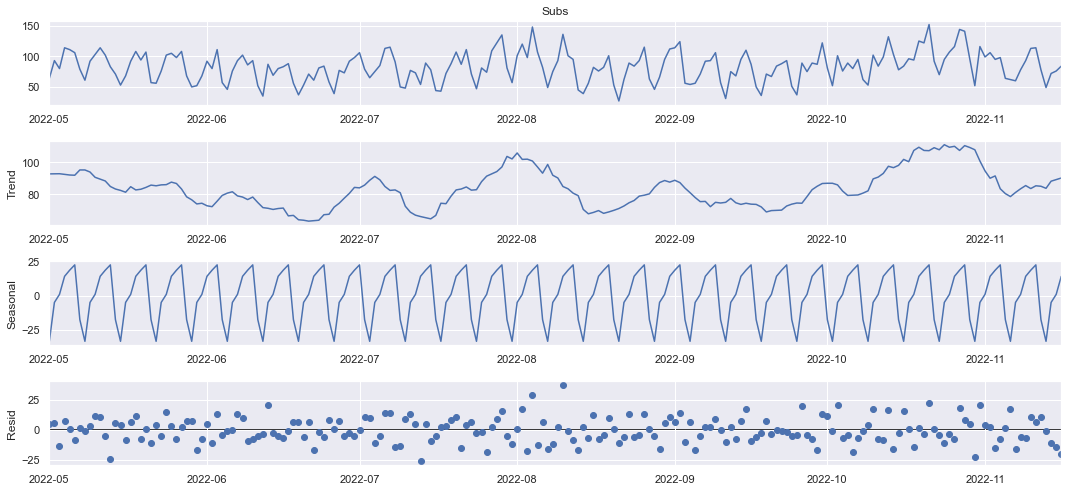

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(subs['Subs'], model = 'additive', extrapolate_trend = 'freq')
result.plot()
plt.show()

Weekly seasonality

In [21]:
print('Subs for the post period: ',subs.loc[subs.index >= '2022-10-17'].sum())

Subs for the post period:  Subs    2959
dtype: int64


In [22]:
print('Subs for the pre period: ', subs.loc[subs.index < '2022-10-17'].sum())

Subs for the pre period:  Subs    13662
dtype: int64


In [23]:
# Set pre-period
pre_period = [str('2022-05-01'), str('2022-10-16')]
# Set post-period
post_period = [str('2022-10-17'), str('2022-11-16')]

In [24]:
print('Pre-period is from ', pre_period[0], ' to ', pre_period[1])
print('Post-period is from ', post_period[0], ' to ', post_period[1])

Pre-period is from  2022-05-01  to  2022-10-16
Post-period is from  2022-10-17  to  2022-11-16


Causal impact model

C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mgrgic\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


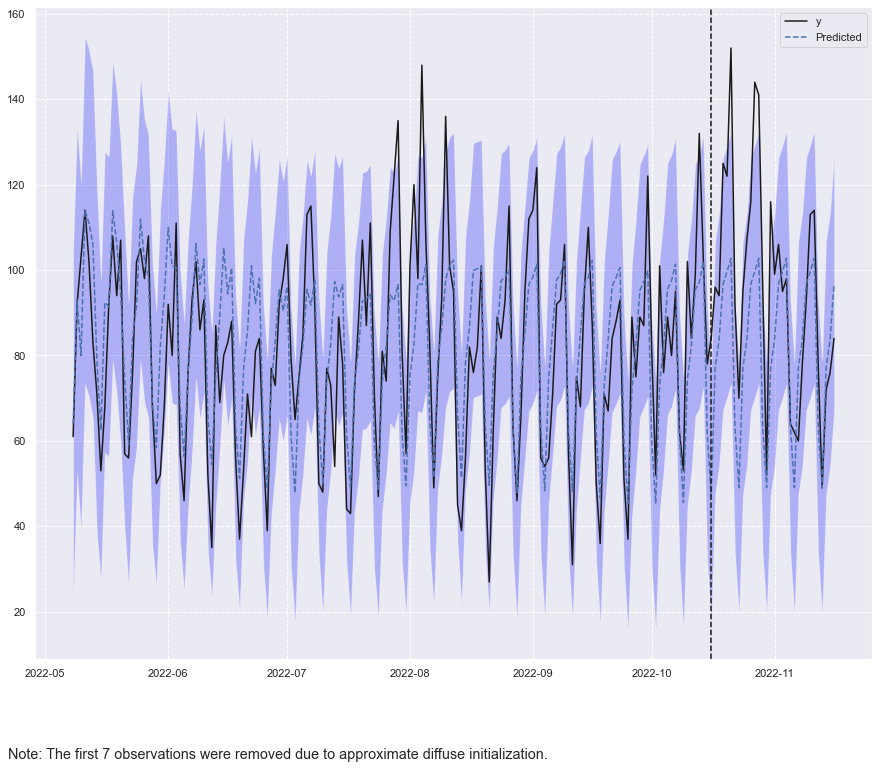

In [25]:
# Causal impact model, prior_level_sd default of 0.01
impact = CausalImpact(data=subs, pre_period=pre_period, post_period=post_period,
                      #prior_level_sd = None,
                     nseasons=[{'period': 7}]
                     )
impact.plot(panels=['original'])

In [26]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 95.45. By contrast, in the absence of an
intervention, we would have expected an average response of 82.16.
The 95% interval of this counterfactual prediction is [75.51, 88.99].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 13.29 with a 95% interval of
[6.46, 19.94]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 2959.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2546.93. The 95% interval of this prediction is [2340.91, 2758.76].


The above results are given in terms of absolute numbers. In relative
terms, the response vari

**increase of +16.18%** \
observed: 2959 \
predicted: 2547 \
difference: 412